### Analysis planning

The analysis performed by delentture will be the same as performed in the first part of the project.

That being said, the columns starting with "past_" will be the key information to be passed, as well as the age

In [46]:
import pandas as pd
import numpy as np
import pydp as dp
import matplotlib.pyplot as plt
from pydp.algorithms.numerical_mechanisms import NumericalMechanism
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
# TODO para validacao

In [47]:
df = pd.read_csv("infringement_dataset_v2.csv")
df.shape

(307511, 46)

2070000 3785754 5590978 6917158 1637370


[Text(0.5, 15.000000000000028, 'infrigiu')]

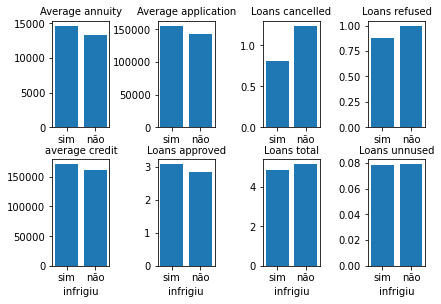

In [48]:


# row = person, column = values
# locate row: df.loc[1]
# selecionar as linhas que infrigiram e que não infrigiram
# cria uma Dataframe para cada caso
sel1 = df[df["infringed"] == 1]
sel2 = df[df["infringed"] == 0]

# definir variáveis para os gráficos

past_annuity = [sel2["past_avg_amount_annuity"].mean(), sel1["past_avg_amount_annuity"].mean()]
past_application = [sel2["past_avg_amt_application"].mean(), sel1["past_avg_amt_application"].mean()]
past_credit = [sel2["past_avg_amt_credit"].mean(), sel1["past_avg_amt_credit"].mean()]
past_approved = [sel2["past_loans_approved"].mean(), sel1["past_loans_approved"].mean()]
past_cancelled = [sel2["past_loans_canceled"].mean(), sel1["past_loans_canceled"].mean()]
past_refused = [sel2["past_loans_refused"].mean(), sel1["past_loans_refused"].mean()]
past_total = [sel2["past_loans_total"].mean(), sel1["past_loans_total"].mean()]
past_unused = [sel2["past_loans_unused"].mean(), sel1["past_loans_unused"].mean()]

age1 = df[df["age"] < 30].size
age2 = df[df["age"] < 40].size - age1
age3 = df[df["age"] < 50].size - age2
age4 = df[df["age"] < 60].size - age3
age5 = df[df["age"] >= 60].size
print(age1, age2, age3, age4, age5)

fig, axs = plt.subplots(2, 4)
fig.tight_layout(pad=1.1)
axs[0, 0].bar(["sim", "não"], past_annuity)
axs[0, 0].set_title("Average annuity", fontsize=10)
axs[0, 1].bar(["sim", "não"], past_application)
axs[0, 1].set_title("Average application", fontsize=10)
axs[1, 0].bar(["sim", "não"], past_credit)
axs[1, 0].set_title("average credit", fontsize=10)
axs[1, 0].set(xlabel = "infrigiu")
axs[1, 1].bar(["sim", "não"], past_approved)
axs[1, 1].set_title("Loans approved", fontsize=10)
axs[1, 1].set(xlabel = "infrigiu")
axs[0, 2].bar(["sim", "não"], past_cancelled)
axs[0, 2].set_title("Loans cancelled", fontsize=10)
axs[0, 3].bar(["sim", "não"], past_refused)
axs[0, 3].set_title("Loans refused", fontsize=10)
axs[1, 2].bar(["sim", "não"], past_total)
axs[1, 2].set_title("Loans total", fontsize=10)
axs[1, 2].set(xlabel = "infrigiu")
axs[1, 3].bar(["sim", "não"], past_unused)
axs[1, 3].set_title("Loans unnused", fontsize=10)
axs[1, 3].set(xlabel = "infrigiu")

In [49]:


def add_laplace_noise(s, sensitivity, epsilon):
  return s + np.random.laplace(loc=0, scale=sensitivity/epsilon)

def percentage_error(orig, est):
  return ((orig-est) / orig) * 100

### Estimate epsilon

In [50]:
len(df.query('age > 40'))
epsilon = 0.1
sens = 1

In [51]:

#print('Original count:', len(census.query('age > 40')))
orig_count = len(df.query('age > 40'))
dp_count = add_laplace_noise(len(df.query('age > 40')), 1, 0.01)
print(orig_count, dp_count, percentage_error(orig_count, dp_count))

171588 171468.06432182773 0.06989747428274383


### Original analysis

In [52]:
original_count = []
original_count.append(len(df.query('age<30')))
original_count.append(len(df.query('age<40')) - original_count[-1])
original_count.append(len(df.query('age<50')) - original_count[-1])
original_count.append(len(df.query('age<60')) - original_count[-1])
original_count.append(len(df.query('age>=60')))
print(original_count)

[45000, 82299, 121543, 150373, 35595]


In [53]:
original_past = []
original_past.append([sel2["past_avg_amount_annuity"].mean(), sel1["past_avg_amount_annuity"].mean()])
original_past.append([sel2["past_avg_amt_application"].mean(), sel1["past_avg_amt_application"].mean()])
original_past.append([sel2["past_avg_amt_credit"].mean(), sel1["past_avg_amt_credit"].mean()])
original_past.append([sel2["past_loans_approved"].mean(), sel1["past_loans_approved"].mean()])
original_past.append([sel2["past_loans_canceled"].mean(), sel1["past_loans_canceled"].mean()])
original_past.append([sel2["past_loans_refused"].mean(), sel1["past_loans_refused"].mean()])
original_past.append([sel2["past_loans_total"].mean(), sel1["past_loans_total"].mean()])
original_past.append([sel2["past_loans_unused"].mean(), sel1["past_loans_unused"].mean()])
print(original_past)

[[14636.327058541274, 13364.183497179574], [155003.88215537314, 142817.25742247657], [170867.81323263212, 161129.7695755352], [3.0644432136281305, 2.8200041937513105], [0.8081672978758438, 1.2345565107989096], [0.8818503660015269, 0.9981128119102537], [4.832645988952592, 5.131474103585657], [0.0781851114470907, 0.07880058712518348]]


### With differential privacy

In [54]:
dp_count = []
dp_count.append(add_laplace_noise((len(df.query('age<30'))), sens, epsilon))
dp_count.append(add_laplace_noise(len(df.query('age<40')) - dp_count[-1], sens, epsilon))
dp_count.append(add_laplace_noise(len(df.query('age<50')) - dp_count[-1], sens, epsilon))
dp_count.append(add_laplace_noise(len(df.query('age<60')) - dp_count[-1], sens, epsilon))
dp_count.append(add_laplace_noise(len(df.query('age>=60')), sens, epsilon))
print(dp_count)

[45008.41743007277, 82284.12451262446, 121556.34779390277, 150362.5876715034, 35595.08575816644]


In [55]:
dp_past = []
dp_past.append([add_laplace_noise(sel2["past_avg_amount_annuity"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_avg_amount_annuity"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_avg_amt_application"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_avg_amt_application"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_avg_amt_credit"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_avg_amt_credit"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_loans_approved"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_loans_approved"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_loans_canceled"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_loans_canceled"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_loans_refused"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_loans_refused"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_loans_total"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_loans_total"].mean(), sens, epsilon)])
dp_past.append([add_laplace_noise(sel2["past_loans_unused"].mean(), sens, epsilon), \
    add_laplace_noise(sel1["past_loans_unused"].mean(), sens, epsilon)])

print(dp_past)

[[14629.873518938475, 13353.946919533693], [155012.98776165317, 142816.7720404168], [170908.22335838337, 161157.84765393636], [17.55735132118841, 1.570211913547832], [13.36027906434568, -32.423857215831426], [17.258090481563148, -20.489890735040138], [2.1513311674365267, 3.6821098046532743], [-13.19206766237199, -2.493311186684485]]


Pode-se depois fazer uma análise com o BoundedSum do python-dp. Comparar os valores obtidos com o do módulo.

In [56]:
dp_sum = BoundedSum(epsilon= 1.5, lower_bound =  5, upper_bound = 250, dtype ='float')
dp_sum_og = dp_sum.quick_result(df['age'].to_list())
print(dp_sum_og)

13357282.23763859
